In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as  sns

In [ ]:
# Haremos un estudío demografico-
#Primero hallaremos la media de edad, la mediana y la moda.
# Después, agruparemos las edades por grupos, y volveremos su valor como categórico para poder compararlo con el género.

In [2]:
df = pd.read_csv('df_final.csv')

C:\Users\Propietario\AppData\Local\Temp\ipykernel_5300\889013762.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('df_final.csv')


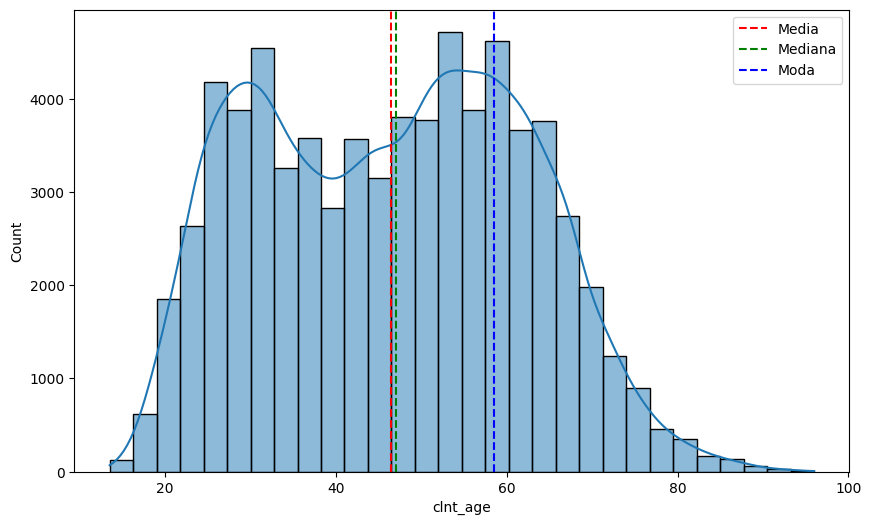

In [3]:
plt.pyplot.figure(figsize=(10,6))
sns.histplot(df['clnt_age'], bins=30, kde=True)
plt.pyplot.axvline(df['clnt_age'].mean(), color='r', linestyle='--', label='Media')
plt.pyplot.axvline(df['clnt_age'].median(), color='g', linestyle='--', label='Mediana')
plt.pyplot.axvline(df['clnt_age'].mode()[0], color='b', linestyle='--', label='Moda')
plt.pyplot.legend()
plt.pyplot.show()

In [4]:
# rango de edad de los clientes
print(f"La edad mínima de los clientes es: {df['clnt_age'].min()}")
print(f"La edad máxima de los clientes es: {df['clnt_age'].max()}")

La edad mínima de los clientes es: 13.5
La edad máxima de los clientes es: 96.0


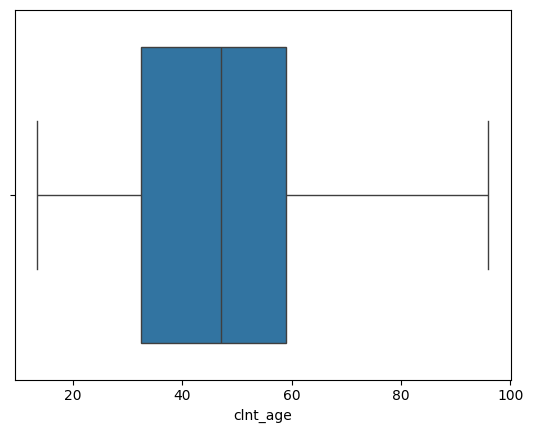

In [7]:
#hacemos un grafico para determinar los outliers
plt.pyplot.figure()
sns.boxplot(x='clnt_age', data=df)
plt.pyplot.show()

In [ ]:
bins = [0, 17, 35, 55, 70, 120]
labels = ['Menor de edad', 'Joven', 'Adulto', 'Senior', 'Anciano']
df['clnt_age_group'] = pd.cut(df['clnt_age'], bins=bins, labels=labels)

In [6]:
df['clnt_age_group'].value_counts()

clnt_age_group
Adulto           26233
Joven            20863
Senior           19314
Anciano           3930
Menor de edad      251
Name: count, dtype: int64

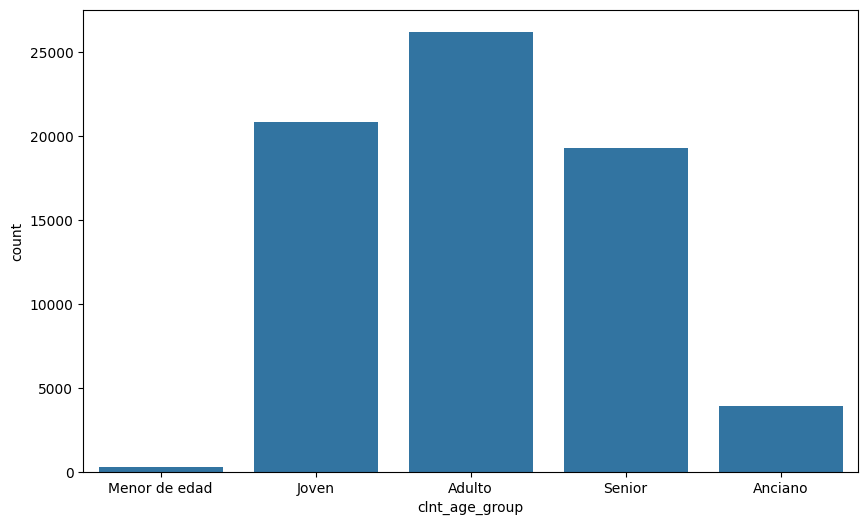

In [7]:
plt.pyplot.figure(figsize=(10,6))
sns.countplot(x='clnt_age_group', data=df)
plt.pyplot.show()

In [8]:
# Borramos la columna menor de edad
df = df.drop(df[df['clnt_age_group'] == 'Menor de edad'].index)

<Axes: xlabel='clnt_age_group', ylabel='count'>

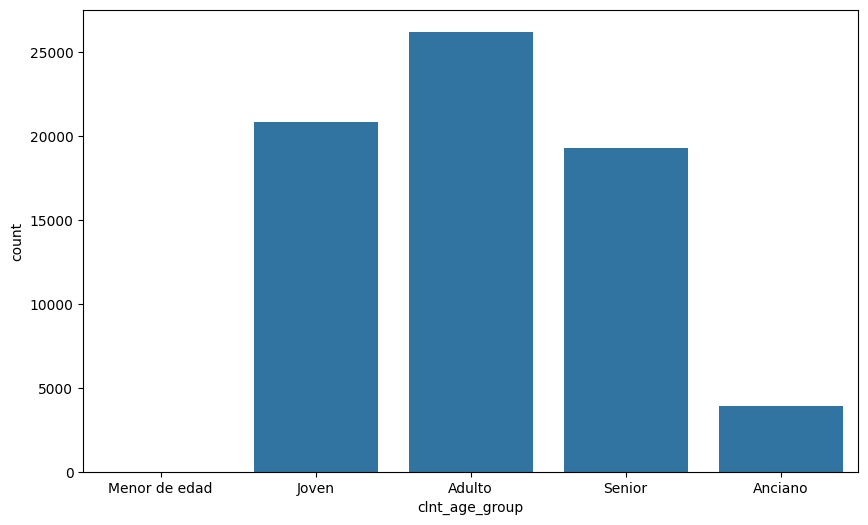

In [9]:
# Ahora sí, haceos una grafica para ver los valores de edad 
plt.pyplot.figure(figsize=(10,6))
sns.countplot(x='clnt_age_group', data
=df)

In [10]:
# Ahora, compararemos la edad de los clientes con su género
tabla_cruzada = pd.crosstab(df['clnt_age_group'], df['gendr'])
print(tabla_cruzada)

gendr              F     M      U
clnt_age_group                   
Joven           4760  5600  10503
Adulto          9107  9409   7717
Senior          7281  7018   5015
Anciano         1552  1646    732


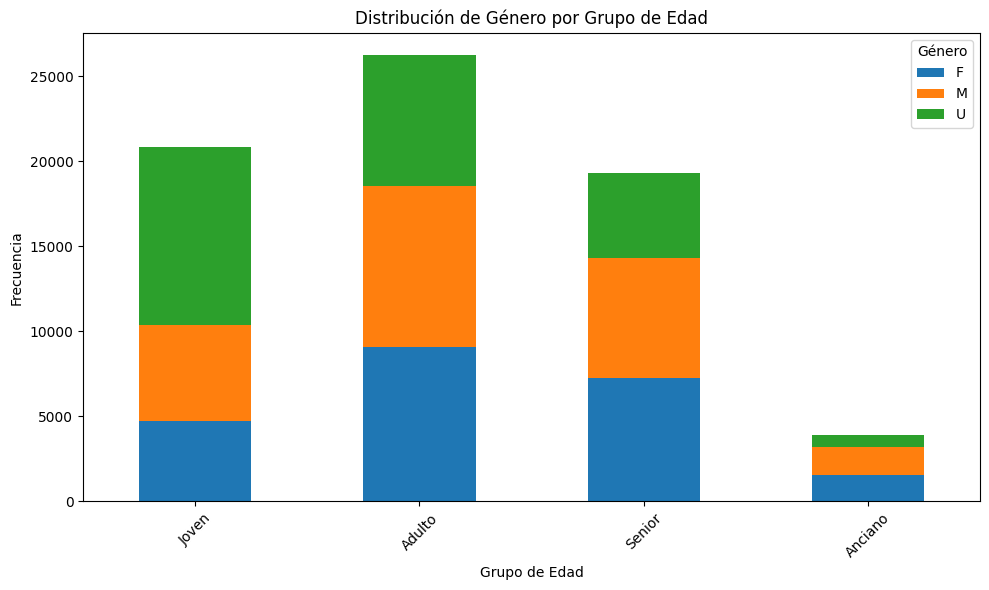

In [11]:
import matplotlib.pyplot as plt

tabla_cruzada.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribución de Género por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.legend(title='Género')
plt.tight_layout()
plt.show()


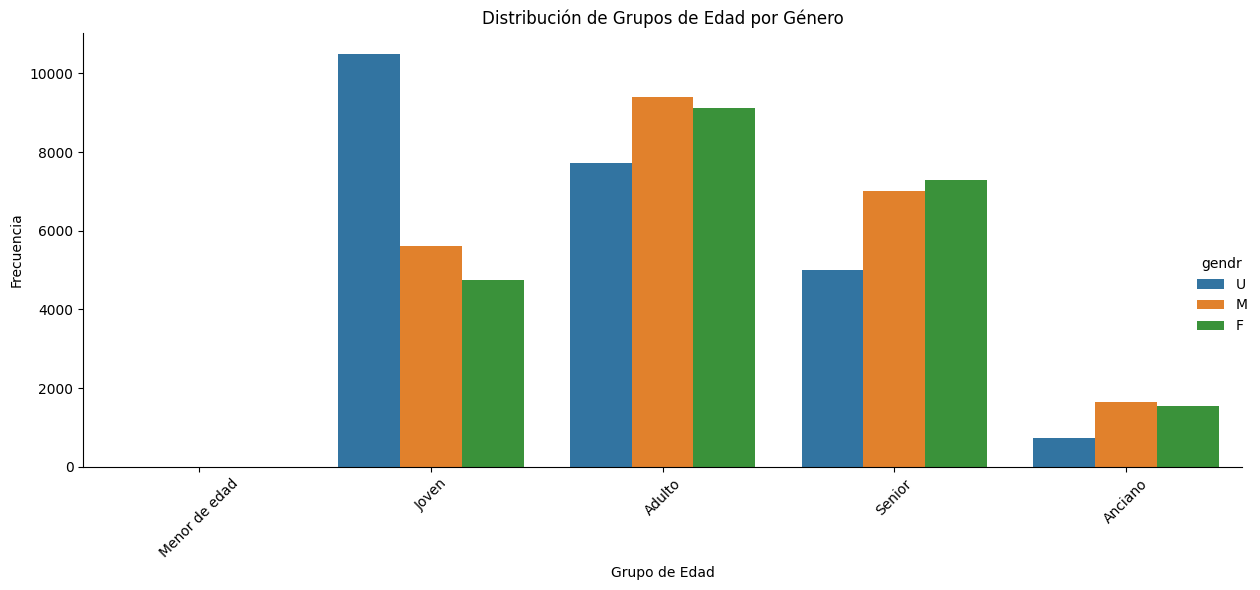

In [12]:
sns.catplot(x='clnt_age_group', hue='gendr', data=df, kind='count', height=6, aspect=2)
plt.title('Distribución de Grupos de Edad por Género')
plt.xlabel('Grupo de Edad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
#Ahora haremos un chisquare para ver si la edad y el género están relacionados
from scipy.stats import chi2_contingency



In [14]:
# y para ver la fuerza de esa relación, haremos un Cramer's V

chi2, p, dof, expected = chi2_contingency(tabla_cruzada)

n = tabla_cruzada.sum().sum() 
v_cramer = np.sqrt(chi2 / (n * (min(tabla_cruzada.shape) - 1)))

print(f"Chi-cuadrado: {chi2}")
print(f"p-valor: {p}")
print(f"Grados de libertad: {dof}")
print(f"V de Cramér: {v_cramer}")
#conclusión: la edad y el género están relacionados, pero la relación es débil.


Chi-cuadrado: 3748.0164897481654
p-valor: 0.0
Grados de libertad: 6
V de Cramér: 0.1632242067441162


In [15]:
#Pensemos ahora en la fiablidad de los datos, y veamos en la columna de cliente en la empresa, cuales son los valores max y min 
print(f"El valor mínimo de la columna 'clnt_tenure_yr' es: {df['clnt_tenure_yr'].min()}")
print(f"El valor máximo de la columna 'clnt_tenure_yr' es: {df['clnt_tenure_yr'].max()}")

El valor mínimo de la columna 'clnt_tenure_yr' es: 2.0
El valor máximo de la columna 'clnt_tenure_yr' es: 62.0


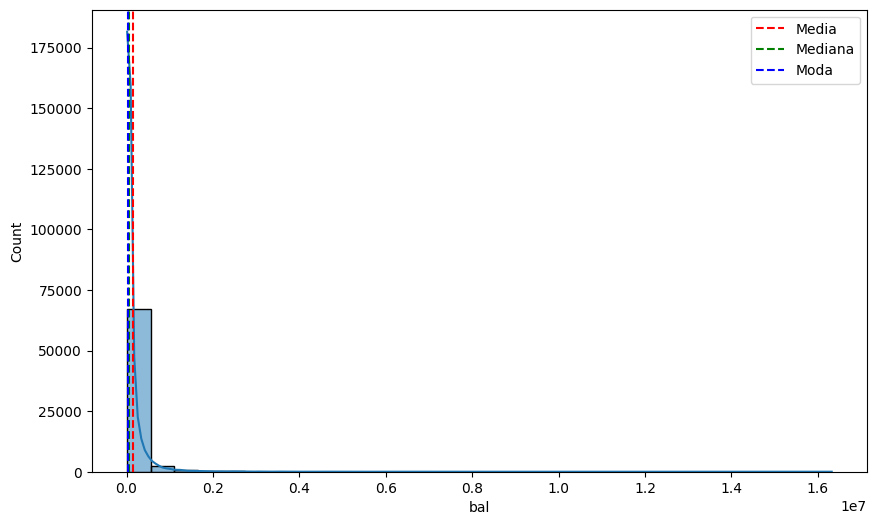

In [19]:
# Gráfico de Bal para ver la media la moda y la media de los ingresos de los clientes
plt.figure(figsize=(10,6))
sns.histplot(df['bal'], bins=30, kde=True)
plt.axvline(df['bal'].mean(), color='r', linestyle='--', label='Media')
plt.axvline(df['bal'].median(), color='g', linestyle='--', label='Mediana')
plt.axvline(df['bal'].mode()[0], color='b', linestyle='--', label='Moda')
plt.legend()
plt.show()

In [20]:
#hacemos print de los resultados para obtenerlos por pantalla
print(f"La media de la columna 'balance' es: {df['bal'].mean()}")
print(f"La mediana de la columna 'balance' es: {df['bal'].median()}")
print(f"La moda de la columna 'balance' es: {df['bal'].mode()[0]}")


La media de la columna 'balance' es: 147854.85415291224
La mediana de la columna 'balance' es: 63558.78
La moda de la columna 'balance' es: 31188.62


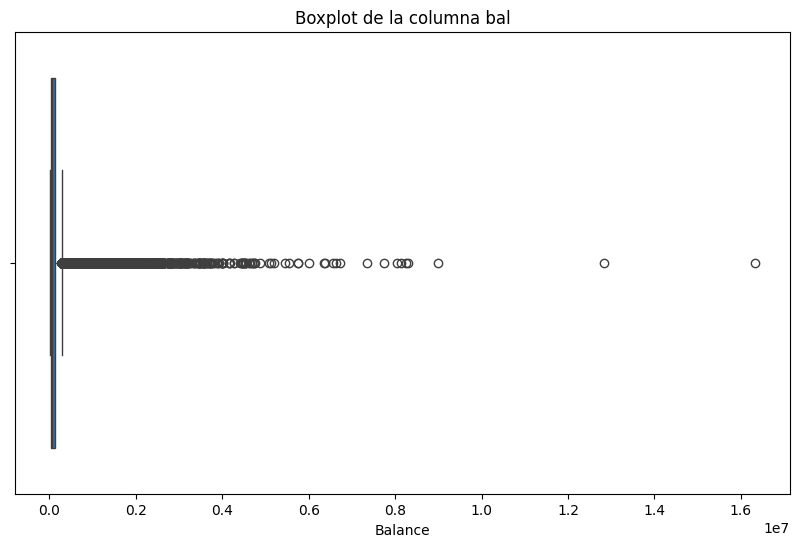

In [ ]:
#Veamos los outliers de la columna bal
plt.figure(figsize=(10,6))
sns.boxplot(x=df['bal'])
plt.title('Boxplot de la columna bal')
plt.xlabel('Balance')
plt.show()

In [27]:
df['bal'].describe()

count    7.034100e+04
mean     1.478549e+05
std      3.019689e+05
min      1.378942e+04
25%      3.750714e+04
50%      6.355878e+04
75%      1.379733e+05
max      1.632004e+07
Name: bal, dtype: float64

In [31]:
# Agrupamos los balances en categorías, partiendo del primer cuartil como bajo, el segundo como medio, el tercero como alto y el cuarto como muy alto
bins = [0, 3.750714e+04, 6.355878e+04, 1.379733e+05, 1.579733e+05]
labels = ['Bajo', 'Medio', 'Alto', 'Muy alto']
df['bal_group'] = pd.cut(df['bal'], bins=bins, labels=labels)



In [32]:
df['bal_group'].value_counts()

bal_group
Bajo        17586
Medio       17585
Alto        17584
Muy alto     2250
Name: count, dtype: int64

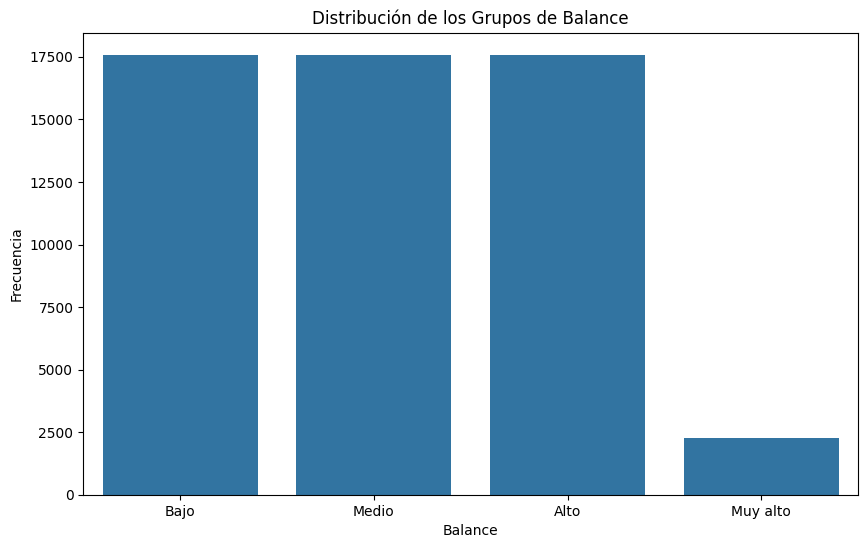

In [33]:
# Mostremos los resultados en un gráfico
plt.figure(figsize=(10,6))
sns.countplot(x='bal_group', data=df)
plt.title('Distribución de los Grupos de Balance')
plt.xlabel('Balance')
plt.ylabel('Frecuencia')
plt.show()

In [34]:
#Entendamos como muy alto, los outliers. Por lo tanto haremos la media de bajo, medio y alto
#hagamos la media, la moda y la mediana de los ingresos de los clientes, por categoría
print("Media de los ingresos de los clientes por categoría:")
print(df.groupby('bal_group')['bal'].mean())
print("\nModa de los ingresos de los clientes por categoría:")
print(df.groupby('bal_group')['bal'].apply(lambda x: x.mode().iloc[0]))
print("\nMediana de los ingresos de los clientes por categoría:")
print(df.groupby('bal_group')['bal'].median())



Media de los ingresos de los clientes por categoría:
bal_group
Bajo         28549.381666
Medio        49138.562933
Alto         93040.862167
Muy alto    147584.860880
Name: bal, dtype: float64

Moda de los ingresos de los clientes por categoría:
bal_group
Bajo         31188.62
Medio        37851.51
Alto         65596.00
Muy alto    137973.33
Name: bal, dtype: float64

Mediana de los ingresos de los clientes por categoría:
bal_group
Bajo         29285.720
Medio        48496.810
Alto         89230.145
Muy alto    147323.600
Name: bal, dtype: float64


C:\Users\Propietario\AppData\Local\Temp\ipykernel_5300\2801332883.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('bal_group')['bal'].mean())
C:\Users\Propietario\AppData\Local\Temp\ipykernel_5300\2801332883.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('bal_group')['bal'].apply(lambda x: x.mode().iloc[0]))
C:\Users\Propietario\AppData\Local\Temp\ipykernel_5300\2801332883.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt 

In [35]:
# Relacionemos los grupos de bal con los de edad, veamos si tiene relacion
tabla_cruzada = pd.crosstab(df['clnt_age_group'], df['bal_group'])
print(tabla_cruzada)

bal_group       Bajo  Medio  Alto  Muy alto
clnt_age_group                             
Joven           7726   6832  4658       372
Adulto          6085   6315  7033       961
Senior          3292   3761  4892       747
Anciano          483    676  1001       170


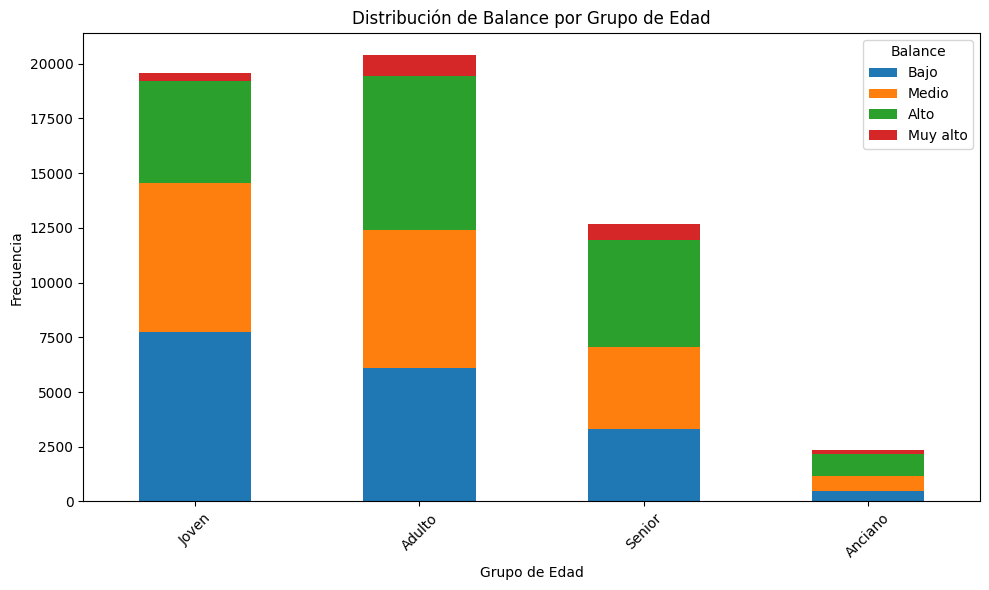

In [36]:
#lo mostraremos en una grafica
tabla_cruzada.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribución de Balance por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.legend(title='Balance')
plt.tight_layout()
plt.show()


In [ ]:
#Hagamos un chi cuadrado para ver si hay relacion entre la edad y el balance
chi2, p, dof, expected = chi2_contingency(tabla_cruzada)



In [38]:
# y para ver la fuerza de esa relación, haremos un Cramer's V
n = tabla_cruzada.sum().sum()
v_cramer = np.sqrt(chi2 / (n * (min(tabla_cruzada.shape) - 1)))


In [39]:
# Imprimimos por pantalla los resultados
print(f"Chi-cuadrado: {chi2}")
print(f"p-valor: {p}")
print(f"Grados de libertad: {dof}")
print(f"V de Cramér: {v_cramer}")
#conclusión: la edad y el balance están relacionados, pero la relación es débil.

Chi-cuadrado: 1812.7221804598482
p-valor: 0.0
Grados de libertad: 9
V de Cramér: 0.10481124030938742


In [40]:
#Ahora veamos la relacion entre el balance y el género
tabla_cruzada = pd.crosstab(df['gendr'], df['bal_group'])
print(tabla_cruzada)


bal_group  Bajo  Medio  Alto  Muy alto
gendr                                 
F          5228   5303  6495       845
M          4581   4678  6180       854
U          7777   7604  4909       551


Text(0.5, 0, 'Género')

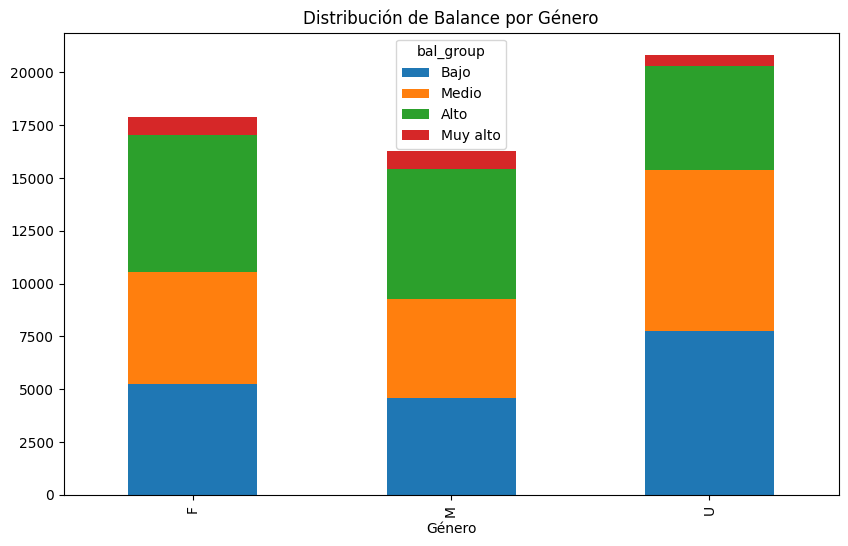

In [41]:
#lo mostraremos en una grafica
tabla_cruzada.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribución de Balance por Género')
plt.xlabel('Género')

In [42]:
#Hagamos un chi cuadrado para ver si hay relacion entre el género y el balance
chi2, p, dof, expected = chi2_contingency(tabla_cruzada)


In [43]:
#Calculamos el coeficiente de Cramer
n = tabla_cruzada.sum().sum()
v_cramer = np.sqrt(chi2 / (n * (min(tabla_cruzada.shape) - 1)))


In [44]:
# Imprimimos por pantalla los resultados
print(f"Chi-cuadrado: {chi2}")
print(f"p-valor: {p}")
print(f"Grados de libertad: {dof}")
print(f"V de Cramér: {v_cramer}")
#conclusión: el género y el balance están relacionados, pero la relación es débil.

Chi-cuadrado: 1446.5953543156136
p-valor: 1.97067521220733e-309
Grados de libertad: 6
V de Cramér: 0.11467201678151023


In [48]:
# DEspues de este análisis demosgráfico.
# Podemos relacionar la media de edad con el balance de los clientes, y ver si hay una relación entre la edad y el balance de los clientes.
# También podemos ver si hay una relación entre el género y el balance de los clientes.
# En ambos casos, la relación es débil, pero existe.
# Ahora buscaremos la moda de cliente. La edad mas repetida, y el balance mas repetido y el genero mas repetido
print(f"La moda de la columna 'clnt_age' es: {df['clnt_age'].mode()[0]}")
print(f"La moda de la columna 'bal' es: {df['bal'].mode()[0]}")
print(f"La moda de la columna 'gendr' es: {df['gendr'].mode()[0]}")


La moda de la columna 'clnt_age' es: 58.5
La moda de la columna 'bal' es: 31188.62
La moda de la columna 'gendr' es: U


In [50]:
# HAremos lo mismo con la mediana
print(f"La mediana de la columna 'clnt_age' es: {df['clnt_age'].median()}")
print(f"La mediana de la columna 'bal' es: {df['bal'].median()}")


La mediana de la columna 'clnt_age' es: 47.0
La mediana de la columna 'bal' es: 63558.78


In [54]:
# y ahora con la media
print(f"La media de la columna 'clnt_age' es: {df['clnt_age'].mean()}")
print(f"La media de la columna 'bal' es: {df['bal'].mean()}")
print(f"La media de la columna 'num_accts' es: {df['num_accts'].mean()}")



La media de la columna 'clnt_age' es: 46.55100227466591
La media de la columna 'bal' es: 147854.85415291224
La media de la columna 'num_accts' es: 2.2556830298119164


## Conclusiones demográficas.

Con los datos que tenemos podemos decir.

El grupo que hemos delimitado como jóvenes (18 - 35) en el 50% de los casos no revela su género
En base a esto no podemos hablar de una relación.
Trantando el género desconocido como un género más, podemos decir que hay una relación, pero esta es dévil. 
Siguiendo la demografía de edades, la población en el rango de edad senior (55 - 70)son los que un mayor balance positivo de cuentas tienen, seguidos de los adultos.


Podemos decir que la moda es Senior (58) de género desconocido y con un balance de 32.000.00

La mediana, es Adultos (47) con un balance de 63.000.00 de género desconocido. Con una media de 2 cuentas personales.

LLegados a este punto ahora eliminarenos los ouliers para sacar las medias de una forma mas precisa.


In [57]:
df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,clnt_age_group,bal_group
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,Senior,Medio
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control,Senior,Alto
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test,Joven,Medio
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test,Adulto,Alto
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control,Joven,Alto
...,...,...,...,...,...,...,...,...,...,...,...,...
70601,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,NaN,Adulto,NaN
70602,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,NaN,Joven,Alto
70603,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,NaN,Senior,Medio
70604,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,NaN,Senior,NaN


In [58]:
# para este analisis de las medias eliminaremos los valores outliers de las columnas que nos dejan obtener mediciones precisas.
# En la columna clnt_age, eliminaremos a los menores de 18 y mayores de 96
df.drop(df[(df['clnt_age'] < 18) | (df['clnt_age'] > 96)].index, inplace=True)


In [59]:
df['bal'].describe()

count    7.021800e+04
mean     1.480528e+05
std      3.021952e+05
min      1.378942e+04
25%      3.758387e+04
50%      6.367345e+04
75%      1.382178e+05
max      1.632004e+07
Name: bal, dtype: float64

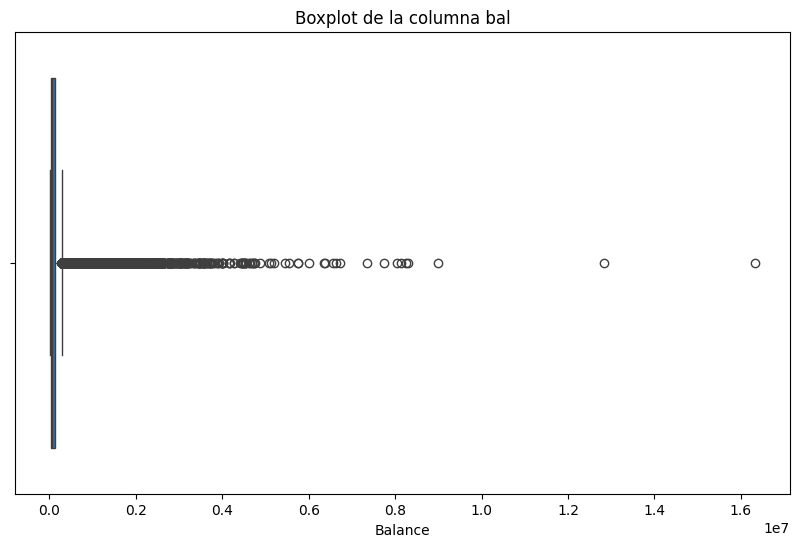

In [60]:
# Haremos un grafico para mostrar los outliers
plt.figure(figsize=(10,6))
sns.boxplot(x=df['bal'])
plt.title('Boxplot de la columna bal')
plt.xlabel('Balance')
plt.show()

In [61]:
#Eliminaremos los 3 ultimos resultados que son outliers
df.drop(df[df['bal'] > 1.379733e+05].index, inplace=True)


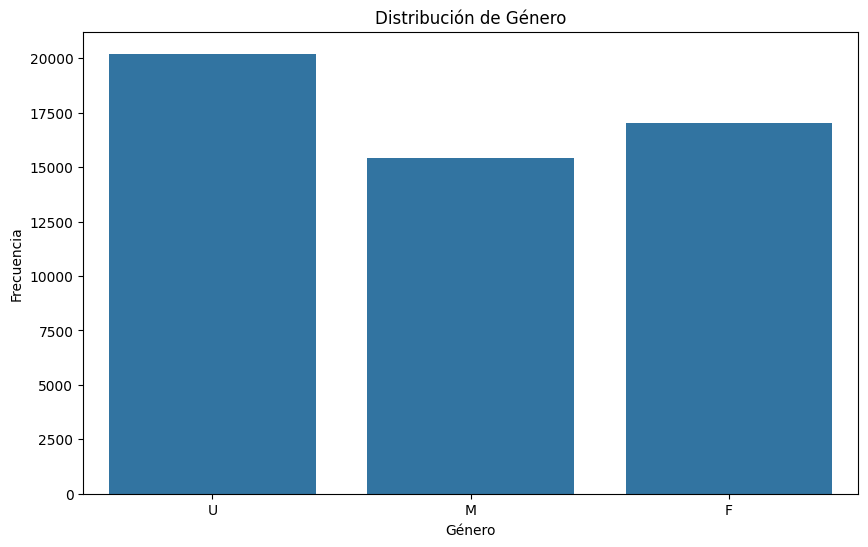

In [62]:
# Ahora para poder encontrar un genero mas repetido, haremos un grafico de barras, con la edad y balance de los clientes
plt.figure(figsize=(10,6))
sns.countplot(x='gendr', data=df)
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

In [66]:
#los porcentajes de los generos
df['gendr'].value_counts(normalize=True) * 100


gendr
U    38.389193
F    32.324441
M    29.286366
Name: proportion, dtype: float64

In [ ]:
# No eliminareos la columna de descononidos porque supone un 15% mas de los valores

In [65]:
# Con unos datos más precisos ahora, mediremos la media de edad, balance y número de cuentas de los clientes
print(f"La media de la columna 'clnt_age' es: {df['clnt_age'].mean()}")
print(f"La media de la columna 'bal' es: {round(df['bal'].mean(), 2)}")
print(f"La media de la columna 'num_accts' es: {df['num_accts'].mean()}")


La media de la columna 'clnt_age' es: 43.92498717485892
La media de la columna 'bal' es: 56959.87
La media de la columna 'num_accts' es: 2.1648806809545524


In [68]:
# Ahora buscaremos el tiempo en la empresa, en meses
df['clnt_tenure_mth'] = df['clnt_tenure_yr'] * 12
df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,clnt_age_group,bal_group,clnt_tenure_mth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,Senior,Medio,72.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control,Senior,Alto,84.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test,Joven,Medio,60.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test,Adulto,Alto,192.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control,Joven,Alto,144.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70597,6746156,8.0,106.0,32.0,F,2.0,19019.55,1.0,1.0,NaN,Joven,Bajo,96.0
70598,2690705,15.0,181.0,53.0,F,2.0,24910.52,3.0,3.0,NaN,Adulto,Bajo,180.0
70599,7979279,4.0,49.0,35.0,F,2.0,40441.45,3.0,3.0,NaN,Joven,Medio,48.0
70602,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,NaN,Joven,Alto,144.0


In [75]:
# Eliminaremos todos los clientes que lleven mas de 40 años en la empresa, puesto que esta empresa es de 1976
df.drop(df[df['clnt_tenure_mnth'] > 40 * 12].index, inplace=True)

In [77]:
# Y haremos una media de los años que llevan en la empresa
print(f"La media de la columna 'clnt_tenure_mnth' es: {df['clnt_tenure_mnth'].mean()}")


La media de la columna 'clnt_tenure_mnth' es: 139.2548054071525


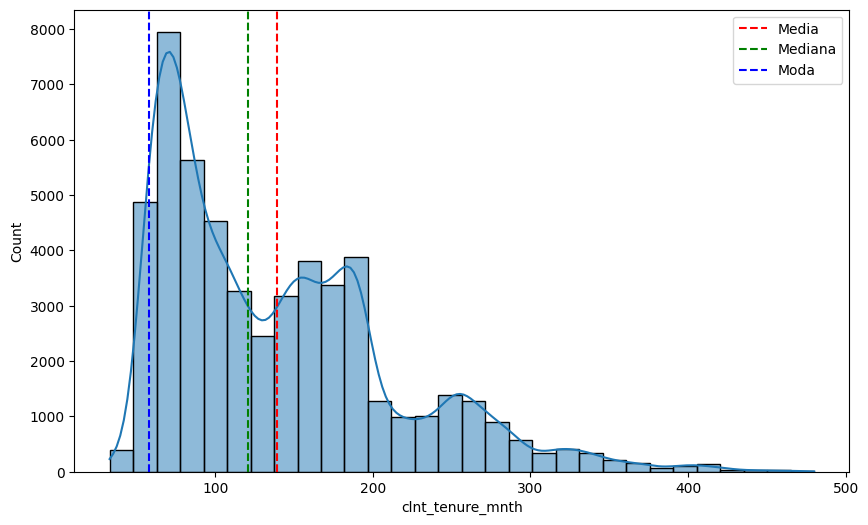

In [79]:
# veamos una gra´fica de los años que llevan en la empresa
plt.figure(figsize=(10,6))
sns.histplot(df['clnt_tenure_mnth'], bins=30, kde=True)
plt.axvline(df['clnt_tenure_mnth'].mean(), color='r', linestyle='--', label='Media')
plt.axvline(df['clnt_tenure_mnth'].median(), color='g', linestyle='--', label='Mediana')
plt.axvline(df['clnt_tenure_mnth'].mode()[0], color='b', linestyle='--', label='Moda')
plt.legend()


## Concluiones DEMOGRÁFICAS

Sin  valores fuera de rango o outliers podemos decir.

Que es imposible determinar una media como géro ya que supone un 6% por encima de los conocidos.

Si lo asumimos como un género más, esta media seria DESCONOCIDA.

Que la media de edad de los clientes es de 44 años. 

Con un balance en cuenta de 57.000.00

Y con dos cuentas abiertas en la empresa, de media.

Con una media de 11,5 años en la empresa.